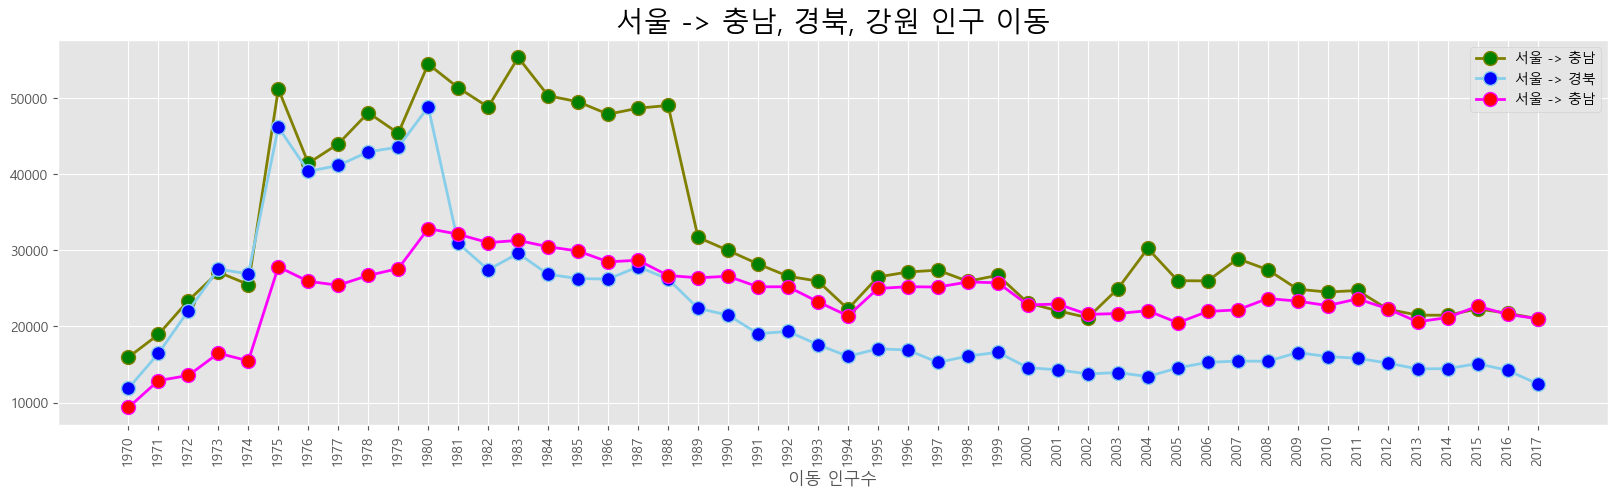

In [3]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

# 서울에서 '충청남도','경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 충남')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_xlabel('이동 인구수', size = 12)

# 축 눈금 위치 지정
ax.set_xticks(range(len(col_years)))

# 축 눈금 레이블 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 레이블 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()